In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
corpus = [
    "el gato come pescado",
    "el perro come carne",
    "el gato y el perro juegan en el jardín",
    "la casa es grande y bonita",
    "los perros y gatos son amigos"
]

In [3]:
from Tukey_utils import Tukey_utils

tukey = Tukey_utils()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ismaelporto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
tokens = [tukey.preprocess(sentence, lang='spanish') for sentence in corpus]

tokens

[['gato', 'come', 'pescado'],
 ['perro', 'come', 'carne'],
 ['gato', 'perro', 'juegan', 'jardín'],
 ['casa', 'grande', 'bonita'],
 ['perros', 'gatos', 'amigos']]

In [5]:
vocabulary = tukey.get_vocabulary(tokens)

In [6]:
vocabulary

['gato',
 'carne',
 'amigos',
 'bonita',
 'pescado',
 'come',
 'jardín',
 'grande',
 'gatos',
 'juegan',
 'casa',
 'perro',
 'perros']

In [7]:
bow_vectors = [tukey.bag_of_words(vocabulary, sentence) for sentence in tokens]

In [8]:
vocabulary

['gato',
 'carne',
 'amigos',
 'bonita',
 'pescado',
 'come',
 'jardín',
 'grande',
 'gatos',
 'juegan',
 'casa',
 'perro',
 'perros']

In [9]:
bow_vectors

[[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]]

In [10]:
bow_matrix = np.array(bow_vectors)

In [11]:
bow_matrix

array([[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]])

In [12]:
# suma por columna
word_counts = np.sum(bow_matrix, axis=0)

In [13]:
word_counts

array([2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1])

In [14]:
word_count_dict = dict(zip(vocabulary, word_counts))
print(word_count_dict)

{'gato': np.int64(2), 'carne': np.int64(1), 'amigos': np.int64(1), 'bonita': np.int64(1), 'pescado': np.int64(1), 'come': np.int64(2), 'jardín': np.int64(1), 'grande': np.int64(1), 'gatos': np.int64(1), 'juegan': np.int64(1), 'casa': np.int64(1), 'perro': np.int64(2), 'perros': np.int64(1)}


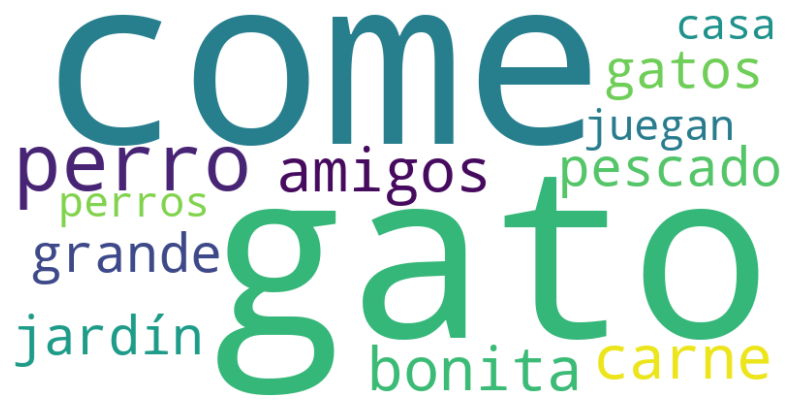

In [15]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, background_color='white')
wc.generate_from_frequencies(word_count_dict)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()